In [1]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
f = ROOT.TFile("SURPRISE_Test_Samples_v10_04_07_05_Run4b_hyper_unified_reco2_BNB_nu_overlay_may8_reco2_hist_62280499_snapshot.root")
t = f.Get("lantern/EventTree")

t2 = f.Get('nuselection/NeutrinoSelectionFilter')

t.AddFriend('nuselection/NeutrinoSelectionFilter')

In [3]:
t3 = f.Get('wcpselection/T_PFeval')
for branch in t3.GetListOfBranches():
    print(branch.GetName())

run
subrun
event
neutrino_type
reco_nuvtxX
reco_nuvtxY
reco_nuvtxZ
reco_showervtxX
reco_showervtxY
reco_showervtxZ
reco_showerKE
reco_muonvtxX
reco_muonvtxY
reco_muonvtxZ
reco_muonMomentum
nuvtx_diff
showervtx_diff
muonvtx_diff
truth_corr_nuvtxX
truth_corr_nuvtxY
truth_corr_nuvtxZ
truth_corr_showervtxX
truth_corr_showervtxY
truth_corr_showervtxZ
truth_showerKE
truth_showerPdg
truth_showerMother
truth_corr_muonvtxX
truth_corr_muonvtxY
truth_corr_muonvtxZ
truth_muonvtxX
truth_muonvtxY
truth_muonvtxZ
truth_muonendX
truth_muonendY
truth_muonendZ
truth_muonMomentum
truth_nuEnergy
truth_energyInside
truth_electronInside
truth_nuPdg
truth_isCC
truth_vtxX
truth_vtxY
truth_vtxZ
truth_nuTime
truth_nuIntType
truth_NCDelta
truth_NprimPio
truth_pio_energy_1
truth_pio_energy_2
truth_pio_angle
truth_Npi0
truth_single_photon
truth_photon_angle
truth_photon_dis
evtDeltaTimeNS
evtTimeNS
reco_protonMomentum
reco_showerMomentum
reco_Nproton
truth_showerMomentum
mcflux_run
mcflux_evtno
mcflux_ndecay
mcflux

In [4]:
Lantern = []
for event in t:
    if event.trueVtxX > 21.5 and event.trueVtxX < 234.85 and event.trueVtxY > -95 and event.trueVtxY < 95 and event.trueVtxZ > 21.5 and event.trueVtxZ < 966.8:
        Lantern.append(event.run + event.subrun + event.event)
pand = []
for event in t2:
    if event.true_nu_vtx_x > 21.5 and event.true_nu_vtx_x < 234.85 and event.true_nu_vtx_y > -95 and event.true_nu_vtx_y < 95 and event.true_nu_vtx_z > 21.5 and event.true_nu_vtx_z < 966.8:
        pand.append(event.run+event.sub+event.evt)
lant = set(Lantern)
pand = set(pand)

In [5]:
print(len(pand - lant))
print(len(lant), len(pand))

170
16409 16145


In [80]:
c = ROOT.TCanvas()
h1 = ROOT.TH1D('h1', 'pandora', 93, 0, 1)
for event in t:
    for i in range(len(event.mc_pdg)):
        if event.mc_pdg[i] == 13:
            h1.Fill(event.mc_px[i])

h2 = ROOT.TH1D('h2', 'Lantern', 93, 0, 1)
for event in t:
    for i in range(len(event.truePrimPartPDG)):
        if event.truePrimPartPDG[i] == 13:
            h2.Fill(event.truePrimPartPx[i])
    
h2.SetLineColor('kRed')
# line1 = ROOT.TLine(234.84, 0,234.84,1550)
# line2 = ROOT.TLine(21.5, 0, 21.5, 1550)
h2.Draw('HIST')
h1.Draw('Same')
c.Draw()

Warning in <TFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2 (Potential memory leak).


In [81]:
h2.GetEntries()

67096.0

In [82]:
h1.GetEntries()

67086.0

In [7]:
c = ROOT.TCanvas()
#t.Draw('true_nu_vtx_x')
t3.Draw('truth_vtxX')
line1 = ROOT.TLine(234.84, 0,234.84,1550)
line2 = ROOT.TLine(21.5, 0, 21.5, 1550)
line2.Draw()
line1.Draw()
c.Draw()

In [8]:
c = ROOT.TCanvas()
t.Draw('trueVtxX')
line1 = ROOT.TLine(234.84, 0,234.84,2000)
line2 = ROOT.TLine(21.5, 0, 21.5, 2000)
line1.Draw()
line2.Draw()
c.Draw()

In [9]:
%%cpp
# include <cmath>

// Last updated on 23 June 2021 by Steven Gardiner .
// Returns true if a given PDG code represents a meson or antimeson . Otherwise
// returns false . Based on points 10 , 12 , and 13 of the Particle Data Group ’s
// " Monte Carlo Particle Numbering Scheme " (2019 revision ).
bool is_meson ( int pdg_code ) {

// Ignore differences between mesons and antimesons for this test . Mesons
// will have positive PDG codes , while antimesons will have negative ones .
    int abs_pdg = std :: abs ( pdg_code ) ;

// Meson PDG codes have no more than seven digits . Seven - digit
// codes beginning with "99" are reserved for generator - specific
// particles
    if ( abs_pdg >= 9900000 ) return false ;

// Mesons have a value of zero for $n_ {q1}$, the thousands digit
    int thousands_digit = ( abs_pdg / 1000 ) % 10;
    if ( thousands_digit != 0 ) return false ;

// They also have a nonzero value for $n_ {q2}$, the hundreds digit
    int hundreds_digit = ( abs_pdg / 100 ) % 10;
    if ( hundreds_digit == 0 ) return false ;

// Reserved codes for Standard Model parton distribution functions
    if ( abs_pdg >= 901 && abs_pdg <= 930 ) return false ;

    // Reggeon and pomeron
    if ( abs_pdg == 110 || abs_pdg == 990 ) return false ;

// Reserved codes for GEANT tracking purposes
    if ( abs_pdg == 998 || abs_pdg == 999 ) return false ;

// Reserved code for generator - specific pseudoparticles
    if ( abs_pdg == 100 ) return false ;

// If we ’ve passed all of the tests above , then the particle is a meson
    return true ;
}

In [10]:
df = ROOT.RDataFrame(t)

In [11]:
%%cpp
// vtx in fv
int signal1(float trueVtxX, float trueVtxY, float trueVtxZ){
    int passfail = 1;
    if (trueVtxX < 21.5 || trueVtxX > 234.8){
        passfail = 0;
        return passfail;
    }
    if (trueVtxY < -95.00 || trueVtxY > 95.00){
        passfail = 0;
        return passfail;
    }
    if (trueVtxZ < 21.5 || trueVtxZ > 966.8){
        passfail = 0;
        return passfail;
    }
    return passfail;
}

In [12]:
%%cpp
// CC 
int signal2(int trueNuPDG, int trueNuCCNC){
    int passfail = 1;
    if (trueNuPDG != 14 || trueNuCCNC != 0){
        passfail = 0;
    }
    return passfail;
}

In [13]:
%%cpp
//has proton
int Nprotons(ROOT::VecOps::RVec<int> truePrimPartPDG){
    int passfail = 0;
    for (size_t i = 0; i < truePrimPartPDG.size();++i){
        if (truePrimPartPDG.at(i) == 2212){
            passfail = 1;
        }
    }
    return passfail;
}

In [14]:
%%cpp
//proton momentum
# include <cmath>
int Pp_signal(ROOT::VecOps::RVec<int> truePrimPartPDG, ROOT::VecOps::RVec<float> truePrimPartPx,  ROOT::VecOps::RVec<float> truePrimPartPy, ROOT::VecOps::RVec<float> truePrimPartPz){
    int passfail = 0;
    int leading_i = -1;
    float leading = -1;
    for (size_t i = 0; i<truePrimPartPDG.size();++i){
        if (truePrimPartPDG.at(i) != 2212) continue;
        float momentum = sqrt(truePrimPartPx.at(i)*truePrimPartPx.at(i) + truePrimPartPy.at(i)*truePrimPartPy.at(i) + truePrimPartPz.at(i)*truePrimPartPz.at(i));
        if (momentum > leading){
        leading_i = i;
        leading = momentum;
        }
    }
    if (leading > 0.25 && leading < 1.00){
        passfail = 1;
    }
    return passfail;
}

In [15]:
%%cpp
//muon momenetum

# include <cmath>
int Mp_signal(ROOT::VecOps::RVec<int> truePrimPartPDG, ROOT::VecOps::RVec<float> truePrimPartPx,  ROOT::VecOps::RVec<float> truePrimPartPy, ROOT::VecOps::RVec<float> truePrimPartPz){
    int passfail = 1;
    float momentum = -1;
    for (size_t i = 0; i<truePrimPartPDG.size();++i){
        if (truePrimPartPDG.at(i) != 13) continue;
        momentum = sqrt(truePrimPartPx.at(i)*truePrimPartPx.at(i) + truePrimPartPy.at(i)*truePrimPartPy.at(i) + truePrimPartPz.at(i)*truePrimPartPz.at(i));
        if (momentum <= 0.1 || momentum >= 1.2){
        passfail = 0;
        }
    
    }
    return passfail;
}

In [16]:
%%cpp
int Mesonless(ROOT::VecOps::RVec<int> truePrimPartPDG){
    int passfail = 1;
    int mesons = 0;
    for (size_t i = 0; i < truePrimPartPDG.size(); ++i){
        if (is_meson(truePrimPartPDG.at(i))){
            passfail = 0;
        }
    }
    return passfail;
}

In [17]:
%%cpp
int allsignal(float trueVtxX, 
              float trueVtxY, 
              float trueVtxZ, 
              int trueNuPDG, 
              int trueNuCCNC,
              ROOT::VecOps::RVec<int> truePrimPartPDG, 
              ROOT::VecOps::RVec<float> truePrimPartPx, 
              ROOT::VecOps::RVec<float> truePrimPartPy, 
              ROOT::VecOps::RVec<float> truePrimPartPz){
    int passfail = 1;
    if (signal1(trueVtxX, trueVtxY, trueVtxZ) == 0 
        || signal2(trueNuPDG, trueNuCCNC) == 0 
        || Nprotons(truePrimPartPDG) == 0
        || Pp_signal(truePrimPartPDG, truePrimPartPx, truePrimPartPy, truePrimPartPz) == 0
        || Mp_signal(truePrimPartPDG, truePrimPartPx, truePrimPartPy, truePrimPartPz) == 0
        || Mesonless(truePrimPartPDG) == 0){
        passfail = 0;
    }
    return passfail;
}

In [18]:
## CC inclusive selection based on pandora selection

In [19]:
%%cpp
int selection0(int foundVertex){
    int passfail = 1;
    if (foundVertex != 1){
        passfail = 0;
    }
    return passfail;
}

In [20]:
%%cpp 
int selection1(float vtxX, float vtxY, float vtxZ){
    int passfail = 1;
    if (vtxX < 21.5 || vtxX > 234.8){
        passfail = 0;
        return passfail;
    }
    if (vtxY < -95.00 || vtxY > 95.00){
        passfail = 0;
        return passfail;
    }
    if (vtxZ < 21.5 || vtxZ > 966.8){
        passfail = 0;
        return passfail;
    }
    return passfail;
}

In [21]:
%%cpp
int selection2(ROOT::VecOps::RVec<float> trackStartPosX, ROOT::VecOps::RVec<float> trackStartPosY, ROOT::VecOps::RVec<float> trackStartPosZ, ROOT::VecOps::RVec<int> trackIsSecondary){
    int passfail = 1;
    for (size_t i = 0; i < trackStartPosX.size(); ++i){
        if (trackIsSecondary.at(i) == 1) continue;
        if (trackStartPosX.at(i) <= 10 || trackStartPosX.at(i) >= 246.35 || trackStartPosY.at(i) <= -106.5 || trackStartPosY.at(i) >= 106.5 || trackStartPosZ.at(i) <= 10.0 || trackStartPosZ.at(i) >= 1026.8){
            passfail = 0;
        } 
    }
    return passfail;
}

In [22]:
%%cpp
int selection3(float vtxFracHitsOnCosmic){
    int passfail = 1;
    if (vtxFracHitsOnCosmic > .1){
        passfail = 0;
    }
    return passfail;
}

In [23]:
%%cpp

int selection4(ROOT::VecOps::RVec<float> trackDistToVtx, ROOT::VecOps::RVec<float> trackStartPosX, ROOT::VecOps::RVec<float> trackStartPosY, ROOT::VecOps::RVec<float> trackStartPosZ,
              ROOT::VecOps::RVec<float> trackEndPosX, ROOT::VecOps::RVec<float> trackEndPosY, ROOT::VecOps::RVec<float> trackEndPosZ,
              ROOT::VecOps::RVec<float> trackMuScore){
    int passfail = 0;
    for (size_t i = 0; i<trackDistToVtx.size(); ++i){
        float X_dist = std::abs(trackStartPosX.at(i) - trackEndPosX.at(i));
        float Y_dist = std::abs(trackStartPosY.at(i) - trackEndPosY.at(i));
        float Z_dist = std::abs(trackStartPosZ.at(i) - trackEndPosZ.at(i));
        
        float track_len = std::sqrt(X_dist*X_dist + Y_dist*Y_dist + Z_dist*Z_dist);
        if (trackDistToVtx.at(i) < 4 && trackMuScore.at(i) > -0.5 && track_len > 10.0){
            passfail = 1;
        }
    }
    return passfail;
}





In [24]:
%%cpp 
int selection4_v2(ROOT::VecOps::RVec<int> trackPID){
    int passfail = 0;
    for (size_t i = 0; i < trackPID.size(); ++i){
        if (trackPID.at(i) == 13){
            passfail = 1;
        }
    }
    return passfail;
}

In [25]:
# reco = 0
# truth = 0
# for event in t:
#     muons1 = 0
#     muons2 = 0
#     for i in range(len(event.trackPID)):
#         X_dist = abs(event.trackStartPosX[i] - event.trackEndPosX[i]);
#         Y_dist = abs(event.trackStartPosY[i] - event.trackEndPosY[i]);
#         Z_dist = abs(event.trackStartPosZ[i] - event.trackEndPosZ[i]);
        
#         track_len = np.sqrt(X_dist*X_dist + Y_dist*Y_dist + Z_dist*Z_dist);
#         if (event.trackDistToVtx[i] < 4) & (event.trackMuScore[i] > -0.5) & (track_len > 10.0):
#             muons1 += 1
#         if event.trackTruePID[i] == 13:
#             muons2 += 1
#         if muons1 > 0:
#             reco += 1
#         if muons2 > 0:
#             truth +=1
            
# print(reco, truth)

In [26]:
%%cpp
int selection5(ROOT::VecOps::RVec<int> trackPID){
    int passfail = 1;
    int Nmuons = 0;
    for (size_t i=0; i < trackPID.size(); ++i){
        if (trackPID.at(i) == 13){
            Nmuons += 1;
            if (Nmuons > 1){
                passfail = 0;
                break;
            }
        }
    }
    return passfail;
}

In [27]:
%%cpp
int selection6_v1(ROOT::VecOps::RVec<int> trackPID, ROOT::VecOps::RVec<float> trackEndPosX, ROOT::VecOps::RVec<float> trackEndPosY, ROOT::VecOps::RVec<float> trackEndPosZ){
    int passfail = 1;
    if (trackPID.size() == 0){
        passfail = 0;
    }
    for (size_t i=0; i<trackPID.size(); ++i){
        if (trackPID.at(i) != 13) continue;
        if (trackEndPosX.at(i) > 246.35 || trackEndPosX.at(i) < 10.0
        || trackEndPosY.at(i) > 106.5 || trackEndPosY.at(i) < -106.5
        || trackEndPosZ.at(i) > 1026.8 || trackEndPosZ.at(i) < 10.0){
            passfail = 0;
        }
    }
    return passfail;
}

In [28]:
%%cpp

int selection6_truth(ROOT::VecOps::RVec<int> trackTruePID, ROOT::VecOps::RVec<float> trackEndPosX, ROOT::VecOps::RVec<float> trackEndPosY, ROOT::VecOps::RVec<float> trackEndPosZ){
    int passfail = 1;
    if (trackTruePID.size() == 0){
        passfail = 0;
    }
    for (size_t i=0; i<trackTruePID.size(); ++i){
        if (trackTruePID.at(i) != 13) continue;
        if (trackEndPosX.at(i) > 246.35 || trackEndPosX.at(i) < 10.0
        || trackEndPosY.at(i) > 106.5 || trackEndPosY.at(i) < -106.5
        || trackEndPosZ.at(i) > 1026.8 || trackEndPosZ.at(i) < 10.0){
            passfail = 0;
        }
    }
    return passfail;
}

In [29]:
%%cpp
# include <cmath>
int selection6_v2(ROOT::VecOps::RVec<float> trackDistToVtx, ROOT::VecOps::RVec<float> trackStartPosX, ROOT::VecOps::RVec<float> trackStartPosY, ROOT::VecOps::RVec<float> trackStartPosZ,
              ROOT::VecOps::RVec<float> trackEndPosX, ROOT::VecOps::RVec<float> trackEndPosY, ROOT::VecOps::RVec<float> trackEndPosZ,
              ROOT::VecOps::RVec<float> trackMuScore){
    int passfail = 1;
    int muon_i = -1;
    
    for (size_t i = 0; i<trackDistToVtx.size(); ++i){
        float X_dist = std::abs(trackStartPosX.at(i) - trackEndPosX.at(i));
        float Y_dist = std::abs(trackStartPosY.at(i) - trackEndPosY.at(i));
        float Z_dist = std::abs(trackStartPosZ.at(i) - trackEndPosZ.at(i));
        
        float track_len = sqrt(X_dist*X_dist + Y_dist*Y_dist + Z_dist*Z_dist);
        if (trackDistToVtx.at(i) < 4 && trackMuScore.at(i) > -0.5 && track_len > 10.0){
            muon_i = i;
        }
    }
    if (muon_i == -1){
        passfail = 0;
        return passfail;
    }
    if (muon_i != -1){
        if (trackEndPosX.at(muon_i) > 246.35 || trackEndPosX.at(muon_i) < 10.0
            || trackEndPosY.at(muon_i) > 106.5 || trackEndPosY.at(muon_i) < -106.5
            || trackEndPosZ.at(muon_i) > 1026.8 || trackEndPosZ.at(muon_i) < 10.0){
                passfail = 0;
        }
    }
    return passfail;
}

In [30]:
%%cpp
# include <cmath>
int selection7(ROOT::VecOps::RVec<int> trackPDG, ROOT::VecOps::RVec<float> trackRecoE){
    int passfail = 1;
    for (size_t i = 0; i < trackPDG.size(); ++i){
        if (trackPDG.at(i) != 13) continue;
        float mom = sqrt(trackRecoE.at(i)*trackRecoE.at(i) + 2*trackRecoE.at(i)*105.6583755);
        if (mom / 1000 <= 0.1 || mom / 1000 >= 1.2){
            passfail = 0;
        }
    }
    return passfail;
}

In [31]:
%%cpp
int selection8(ROOT::VecOps::RVec<int> showerIsSecondary, ROOT::VecOps::RVec<int> trackPID){
    int passfail = 1;
    for (size_t i = 0; i < showerIsSecondary.size(); ++i){
        if (showerIsSecondary.at(i) == 1){
            passfail = 0;
            break;
        }
    }
    int num_P = 0;
    for (size_t i=0;i < trackPID.size(); ++i){
        if (trackPID.at(i) != 2212){
            num_P += 1;
        }
    }
    if (num_P == 0){
        passfail = 0;
    }
    return passfail;
}

In [32]:
%%cpp
int pionless(ROOT::VecOps::RVec<int> trackPDG){
    int passfail = 1;
    for (size_t i=0; i< trackPDG.size(); ++i){
        if (trackPDG.at(i) == 13) continue;
        if (trackPDG.at(i) != 2212){
            passfail = 0;
        }
    }
    return passfail;
}

In [33]:
%%cpp
int protonMom(ROOT::VecOps::RVec<int> trackPID, ROOT::VecOps::RVec<float> trackRecoE){
    int passfail = 1;
    float leading = -1;
    for (size_t i=0; i < trackPID.size(); ++i){
        if (trackPID.at(i) != 2212) continue;
        
        
        float mom = sqrt(trackRecoE.at(i) *trackRecoE.at(i) + 2*trackRecoE.at(i)*938.27208943);
        if (mom > leading){
            leading = mom;
        }
    }
    if (leading / 1000 >= 1 || leading / 1000 <= 0.25){
        passfail = 0;
    }
    return passfail;
}

In [34]:
%%cpp 
int showerless(int nShowers){
    int passfail = 1;
    if (nShowers != 0){
        passfail = 0;
    }
    return passfail;
}

In [35]:
%%cpp
float Pp(ROOT::VecOps::RVec<int> trackPID, ROOT::VecOps::RVec<float> trackRecoE){
    float leading = -1;
    for (size_t i=0; i < trackPID.size(); ++i){
        if (trackPID.at(i) != 2212) continue;
        
        
        float mom = sqrt(trackRecoE.at(i) *trackRecoE.at(i) + 2*trackRecoE.at(i)*938.27208943);
        if (mom > leading){
            leading = mom;
        }
    }
    return leading / 1000;
    
}

In [36]:
count = 0
count2 = 0
for event in t:
    for i in range(len(event.trackRecoE)):
        count2 += 1
        if event.trackRecoE[i]**2 > 938.27208943**2:
            count += 1
print(count2 - count)

88076


In [37]:
## Testing CC inclusive Selection

In [38]:
%%cpp
int fullSelection(int foundVertex,
                  float vtxX, 
                  float vtxY, 
                  float vtxZ,
                  ROOT::VecOps::RVec<float> trackStartPosX, 
                  ROOT::VecOps::RVec<float> trackStartPosY, 
                  ROOT::VecOps::RVec<float> trackStartPosZ, 
                  ROOT::VecOps::RVec<int> trackIsSecondary,
                  float vtxFracHitsOnCosmic,
                  ROOT::VecOps::RVec<float> trackEndPosX, 
                  ROOT::VecOps::RVec<float> trackEndPosY, 
                  ROOT::VecOps::RVec<float> trackEndPosZ,
                  ROOT::VecOps::RVec<float> trackMuScore, 
                  ROOT::VecOps::RVec<int> trackPID,
                  ROOT::VecOps::RVec<float> trackRecoE,
                  ROOT::VecOps::RVec<int> showerIsSecondary,
                  int nShowers
                 ){
    if (selection0(foundVertex) == 0
        || selection1(vtxX, vtxY, vtxZ) == 0
        || selection2(trackStartPosX, trackStartPosY, trackStartPosZ, trackIsSecondary) == 0
        || selection3(vtxFracHitsOnCosmic) == 0
        || selection4_v2(trackPID) == 0
        || selection5(trackPID) == 0 
        || selection6_v1(trackPID, trackEndPosX, trackEndPosY, trackEndPosZ) == 0
        || selection7(trackPID, trackRecoE) == 0
        || selection8(showerIsSecondary, trackPID) == 0
        || pionless(trackPID) == 0
        || protonMom(trackPID, trackRecoE) == 0
        || showerless(nShowers) == 0){
        return 0;
    }
    return 1;
}

In [39]:
'Select0', 'Select1', 'Select2', 'Select3', 'Select4', 'Select5', 'V1', 'Select7', 'Select8', 'Pionless', 'ProtonMom'

('Select0',
 'Select1',
 'Select2',
 'Select3',
 'Select4',
 'Select5',
 'V1',
 'Select7',
 'Select8',
 'Pionless',
 'ProtonMom')

In [40]:
%%cpp
# include <cmath>

float magnitude(float x, float y, float z){
        return sqrt(x*x + y*y + z*z);
    }

In [41]:
%%cpp

int is_Signal(Float_t true_nu_vtx_x, Float_t true_nu_vtx_y, Float_t true_nu_vtx_z, Int_t nu_pdg,
    Int_t ccnc, ROOT::VecOps::RVec<int> mc_pdg, 
        ROOT::VecOps::RVec<float> mc_px, ROOT::VecOps::RVec<float> mc_py, ROOT::VecOps::RVec<float> mc_pz){
    
    
    
    bool isSignal = true;
    if (true_nu_vtx_x > 234.85 || true_nu_vtx_x < 21.5){
        isSignal = false;
    }
    if (true_nu_vtx_y > 95.00 || true_nu_vtx_y < -95.00){
        isSignal = false;
    }
    if (true_nu_vtx_z > 966.8 || true_nu_vtx_z < 21.5){
       isSignal = false;
    }
    if (ccnc != 0 || nu_pdg != 14){
        isSignal = false;
    }
    bool isProton = false;
    for (size_t i = 0; i < mc_pdg.size(); ++i){
        if (mc_pdg[i] == 2212){
            isProton = true;
            break;
        }    
    }
    if (!(isProton)){
        isSignal = false;
    }
    
    bool muon_in_mom = false;
    for (size_t i = 0; i < mc_pdg.size(); ++i){
        if (mc_pdg[i] != 13) continue;
        
        float mag = magnitude(mc_px[i], mc_py[i], mc_pz[i]);
        
        if (mag <= 1.2 && mag >= 0.1){
           muon_in_mom = true;
            
        }
        
    }
    if (!(muon_in_mom)){
            isSignal = false;
        }
    
    float leading = -999.0;
    
    for (size_t i = 0; i < mc_px.size(); ++i){
        if (mc_pdg[i] != 2212) continue;
        
        float mag = magnitude(mc_px[i], mc_py[i], mc_pz[i]);
        
        if (mag > leading){
            leading = mag;
        }
        
    }
    if (leading > 1.0 || leading < 0.25){
            isSignal = false;
        }
    

    
    int mesons = 0;
    for (size_t i = 0; i < mc_pdg.size(); ++i){
        if (is_meson(mc_pdg[i])){
            mesons += 1;
            break;
        }
    }
    if (mesons != 0){
        isSignal = false;
    }
    if (isSignal){
        return 1;
    }
    else{
        return 0;
    }
}

In [42]:
%%cpp
int find_category(Float_t true_nu_vtx_x, 
             Float_t true_nu_vtx_y, 
             Float_t true_nu_vtx_z,
             Int_t ccnc,
             ROOT::VecOps::RVec<int> mc_pdg, 
             ROOT::VecOps::RVec<float> mc_px, 
             ROOT::VecOps::RVec<float> mc_py, 
             ROOT::VecOps::RVec<float> mc_pz,
             int nu_pdg,
             int interaction){
    bool isSignal = true;
    int EventID = -1;
    if (is_Signal(true_nu_vtx_x, true_nu_vtx_y, true_nu_vtx_z, nu_pdg, ccnc, mc_pdg, mc_px, mc_py, mc_pz) == 0){
        isSignal = false;
    }
    if (true_nu_vtx_x > 234.85 || true_nu_vtx_x < 21.5){
            EventID = 9;
            return EventID;
        }
        else if (true_nu_vtx_y > 95.00 || true_nu_vtx_y < -95.00){
            EventID = 9;
            return EventID;        
        }
        else if (true_nu_vtx_z > 966.8 || true_nu_vtx_z < 21.5){
            EventID = 9;
            return EventID;
        }
    
    else if (ccnc == 1){
            EventID = 8;
            return EventID;
        }
    else if (ccnc == 0 && nu_pdg == 12){
            EventID = 7;
            return EventID;
        }
    else if (nu_pdg != 14){
        EventID = 10;
        return EventID;
    }
    if (isSignal){
        if (interaction == 1001){
            EventID = 0;
            return EventID;
        }
        if (interaction == 10){
            EventID = 1;
            return EventID;
        }
        if (interaction == 1){
            EventID = 2;
            return EventID;
        }
        else {
            EventID = 3;
            return EventID;
        }
    }
    else{
        
        
        ROOT::VecOps::RVec<int> pions = {111, 211};
        int num_pi = 0;
        int num_pro = 0;
        if (nu_pdg == 14 && ccnc == 0){
            for (size_t i = 0; i < mc_pdg.size(); ++i){
                if (mc_pdg[i] == 2212){
                    float mag = magnitude(mc_px[i], mc_py[i], mc_pz[i]);
                    if (mag >= 0.25 && mag <= 1.0){
                        num_pro += 1;
                    }
                }
                for (size_t j = 0; j < pions.size(); ++j){
                    if (std::abs(mc_pdg[i]) == pions[j]){
                        num_pi += 1;
                    }
                }
            }
        
        }
        if (nu_pdg == 14 && ccnc == 0 && num_pi > 0){
            EventID = 4;
            return EventID;
        }
        else if (num_pi == 0 && num_pro == 0){
            EventID = 5;
            return EventID;
        }
        else {
            EventID = 6;
            return EventID;
        }
        
    }
}

In [44]:
f = ROOT.TFile("SURPRISE_Test_Samples_v10_04_07_05_Run4b_hyper_unified_reco2_BNB_nu_overlay_may8_reco2_hist_62280499_snapshot.root")
t = f.Get("lantern/EventTree")

t2 = f.Get('nuselection/NeutrinoSelectionFilter')

t.AddFriend('nuselection/NeutrinoSelectionFilter')

df = ROOT.RDataFrame(t)

category = df.Define('Category', 'find_category(trueVtxX, trueVtxY, trueVtxZ,trueNuCCNC,truePrimPartPDG, truePrimPartPx, truePrimPartPy,  truePrimPartPz, trueNuPDG, trueNuIntrxnType)')

sig1 = category.Define("Sig1", "signal1(trueVtxX, trueVtxY, trueVtxZ)")
sig2 = sig1.Define("Sig2", "signal2(trueNuPDG, trueNuCCNC)")
sig3 = sig2.Define("Sig3", "Nprotons(truePrimPartPDG)")
sig4 = sig3.Define("Sig4", "Pp_signal(truePrimPartPDG, truePrimPartPx, truePrimPartPy, truePrimPartPz)")
sig5 = sig4.Define("Sig5", "Mp_signal(truePrimPartPDG, truePrimPartPx, truePrimPartPy, truePrimPartPz)")
sig6 = sig5.Define("Sig6", "Mesonless(truePrimPartPDG)")

signal = sig6.Define("Signal", "is_Signal(trueVtxX,  trueVtxY,  trueVtxZ,  trueNuPDG, trueNuCCNC,  truePrimPartPDG, truePrimPartPx,  truePrimPartPy,  truePrimPartPz)")
select0 = signal.Define("Select0", "selection0(foundVertex)")
select1 = select0.Define("Select1", 'selection1(vtxX, vtxY, vtxZ)')
select2 = select1.Define("Select2", "selection2(trackStartPosX, trackStartPosY, trackStartPosZ, trackIsSecondary)")
select3 = select2.Define("Select3", "selection3(vtxFracHitsOnCosmic)")
#select4 = select3.Define("Select4", "selection4(trackDistToVtx, trackStartPosX, trackStartPosY, trackStartPosZ, trackEndPosX, trackEndPosY, trackEndPosZ, trackMuScore)")
select4 = select3.Define("Select4", "selection4_v2(trackPID)")
select5 = select4.Define("Select5", "selection5(trackPID)")
v1 = select5.Define("V1", 'selection6_v1(trackPID, trackEndPosX, trackEndPosY, trackEndPosZ)')
v2 = v1.Define("V2", "selection6_v2(trackDistToVtx, trackStartPosX, trackStartPosY, trackStartPosZ, trackEndPosX, trackEndPosY, trackEndPosZ, trackMuScore)")
select7 = v2.Define("Select7", "selection7(trackPID, trackRecoE)")
select8 = select7.Define("Select8", 'selection8(showerIsSecondary, trackPID)')
truth = select8.Define("truth", 'selection6_v1(trackTruePID, trackEndPosX, trackEndPosY, trackEndPosZ)')
_0pi = truth.Define("Pionless", "pionless(trackPID)")
protonmom = _0pi.Define("ProtonMom", "protonMom(trackPID, trackRecoE)")
Pp = protonmom.Define('Pp', 'Pp(trackPID, trackRecoE)')
select = Pp.Define("Selected", """fullSelection(foundVertex,
                   vtxX, 
                   vtxY, 
                   vtxZ,
                   trackStartPosX, 
                   trackStartPosY, 
                   trackStartPosZ, 
                   trackIsSecondary,
                   vtxFracHitsOnCosmic,
                   trackEndPosX, 
                   trackEndPosY, 
                   trackEndPosZ,
                   trackMuScore, 
                   trackPID,
                   trackRecoE,
                   showerIsSecondary, nShowers)""")
showerless = select.Define("Showerless", "showerless(nShowers)")


ary = showerless.AsNumpy(['run', 'subrun', 'Showerless', 'event', 'Pp',  "Sig1", 'Sig2', 'Sig3', 'Sig4', 'Sig5', 'Sig6', 'Signal', "Selected", 'V1', 'V2','Select0', 'Select1', 'Select2', "Select3", 'Select4', 'Select5', 'Select7', 'Select8', 'Pionless', 'ProtonMom'])

showerless.Snapshot('Lantern_cuts_mc', 'Lantern_cuts_mc.root', ['V1', 'Pp', 'Selected', 'Category', 'weightSplineTimesTune',
                                                         'V2', 
#                                                          "truth", 
                                                         'Select0', 
                                                         'Select1', 
                                                         'Select2', 
                                                         "Select3", 
                                                         'Select4', 
                                                         'Select5', 
                                                         'Select7', 
                                                         'Select8', 
                                                         'Pionless', 
                                                         'ProtonMom', 
                                                         'Sig1', 
                                                         'Sig2', 
                                                         'Sig3', 
                                                         'Sig4', 
                                                         'Sig5', 
                                                         'Sig6', 
                                                           'Signal', 
                                                         'run', 'subrun', 'event', 'Showerless'])

<cppyy.gbl.ROOT.RDF.RResultPtr<ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void> > object at 0x2e455d70>

In [45]:
real = 0
for val in ary['Selected']:
    if val != 0:
        real += 1
print(real)
print(len(ary['Selected']))

1975
93691


In [46]:
big_df = pd.DataFrame(ary)

In [47]:
len(big_df.keys())

25

In [48]:
df_eff = pd.DataFrame(ary)

In [49]:
# v1mask = df_eff['V1'] == 1
# v2mask = df_eff['V2'] == 1
# truthmask = df_eff['truth'] == 1
# v2 = df_eff[v2mask]
# v1 = df_eff[v1mask]
# truth = df_eff[truthmask]
# print(len(v1))
# print(len(v2))
# print(len(truth))

In [50]:
keylist = ['Sig1', 'Sig2', 'Sig3', 'Sig4', 'Signal']
orig = df_eff
print(len(orig))
for key in keylist:
    mask = orig[key] == 1
    orig = orig[mask]
    print(len(orig))

93691
26427
18869
18067
14288
9015


In [51]:
print(len(ary['Select1']))
print(len(ary['Signal']))

93691
93691


In [52]:
keylist = ['Select0', 'Select1', 'Select2', 'Select3', 'Select4', 'Select5', 'V1', 'Select7', 'Select8', 'Pionless', 'ProtonMom', 'Showerless']
purity = [0]
orig1 = df_eff
orig2 = df_eff
for key in keylist:
    sel_mask = orig1[key] == 1
    orig1 = orig1[sel_mask]
    
    selsig_mask = (orig2[key] == 1) & (orig2['Signal'] == 1)
    orig2 = orig2[selsig_mask]
    
    
    purity.append(len(orig2) / len(orig1))
    print(key)
purity = np.array(purity)

Select0
Select1
Select2
Select3
Select4
Select5
V1
Select7
Select8
Pionless
ProtonMom
Showerless


In [53]:
sel0_mask = df_eff['Select0'] == 1
sel0_data = df_eff[sel0_mask]
sel1_mask = sel0_data['Select1'] == 1
sel1_data = sel0_data[sel1_mask]
sel2_mask = sel1_data['Select2'] == 1
sel2_data = sel1_data[sel2_mask]
sel3_mask = sel2_data['Select3'] == 1
sel3_data = sel2_data[sel3_mask]
sel4_mask = sel3_data['Select4'] == 1
sel4_data = sel3_data[sel4_mask]

sigMask0 = sel0_data['Signal'] == 1
sig0 = sel0_data[sigMask0]
sigMask1 = sel1_data['Signal'] == 1
sig1 = sel1_data[sigMask1]
sigMask2 = sel2_data['Signal'] == 1
sig2 = sel2_data[sigMask2]
sigMask3 = sel3_data['Signal'] == 1
sig3 = sel3_data[sigMask3]
sigMask4 = sel4_data['Signal'] == 1
sig4 = sel4_data[sigMask4]

print(len(sig0) / len(sel0_data))
print(len(sig1) / len(sel1_data))
print(len(sig2) / len(sel2_data))
print(len(sig3) / len(sel3_data))
print(len(sig4) / len(sel4_data))


0.22357964989677895
0.3783888271396124
0.3783378482972136
0.39822826534816647
0.4955381658429434


In [54]:
mask = df_eff['Signal'] == 1
df_eff = df_eff[mask]

In [55]:
print(len(df_eff))

9018


In [56]:
lens = [len(df_eff)]
orig = df_eff
for key in keylist:
    mask = orig[key] == 1
    orig = orig[mask]
    
    
    lens.append(len(orig))
lens = np.array(lens)

In [57]:
lens

array([9018, 7906, 7830, 7821, 7732, 7219, 6359, 3258, 3110, 2434, 1978,
       1870, 1691])

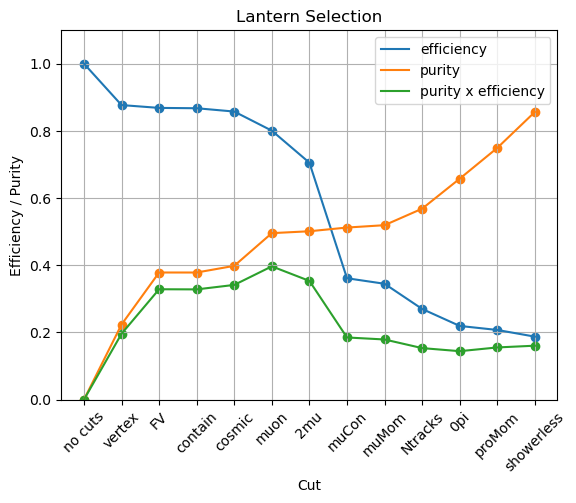

In [58]:
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
y = lens / len(df_eff)

fig, ax = plt.subplots()
ax.plot(x, y, label = 'efficiency')
ax.scatter(x, y)
ax.plot(x, purity, label = 'purity')
ax.scatter(x, purity)

ax.plot(x, purity*y, label = 'purity x efficiency')
ax.scatter(x, purity*y)

ax.set_ylim(0, 1.1)
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax.set_xticklabels(['no cuts', 'vertex', 'FV', 'contain', 'cosmic', 'muon', '2mu', 'muCon', 'muMom', 'Ntracks', '0pi', 'proMom', 'showerless'], rotation = 45)
ax.grid()
ax.set_ylabel('Efficiency / Purity')
ax.set_xlabel('Cut')
ax.set_title('Lantern Selection')
plt.legend()
#plt.savefig('CCNp0pi_full_lantern.png', format = 'png')

In [59]:
print(y)

[1.         0.87669106 0.86826347 0.86726547 0.85739632 0.80051009
 0.70514527 0.36127745 0.34486582 0.26990464 0.2193391  0.20736305
 0.18751386]


In [60]:
h = ROOT.TH1D('h', 'fracHitsOnCosmic', 100, 0, 1.5)
for event in t:
    h.Fill(event.vtxFracHitsOnCosmic)
    
c = ROOT.TCanvas()
h.Draw()
c.Draw()

In [61]:

    
h1 = ROOT.TH1D('h1', 'muons', 100, -4, 0)
h1.SetFillColor(ROOT.kBlue)
h2 = ROOT.TH1D('h2', 'electrons', 100, -4, 0)
h2.SetFillColor(ROOT.kGreen)
h3 = ROOT.TH1D('h3', 'pions', 100, -4, 0)
h3.SetFillColor(ROOT.kPink)
h4 = ROOT.TH1D('h4', 'protons', 100, -4, 0)
h4.SetFillColor(ROOT.kOrange)
h5 = ROOT.TH1D('h5', 'photons', 100, -4, 0)
h5.SetFillColor(ROOT.kCyan)
h6 = ROOT.TH1D('h6', 'neutrons', 100, -4, 0)
h6.SetFillColor(ROOT.kGreen +1)
h7 = ROOT.TH1D('h7', 'cosmic', 100, -4, 0)
h7.SetFillColor(ROOT.kBlack)
h8 = ROOT.TH1D('h8', 'other', 100, -4, 0)
h8.SetFillColor(ROOT.kGray)
    
    
for event in t:
    quantities = list(getattr(event, 'trackPrScore'))
    PDGs = list(getattr(event, 'trackTruePID'))
    for i in range(len(quantities)):
        if np.abs(PDGs[i]) == 13:
            h1.Fill(quantities[i])
        elif np.abs(PDGs[i]) == 11:
            h2.Fill(quantities[i])
        elif np.abs(PDGs[i]) == 111 or np.abs(PDGs[i]) == 211:
            h3.Fill(quantities[i])
        elif np.abs(PDGs[i]) == 2212:
            h4.Fill(quantities[i])
        elif np.abs(PDGs[i]) == 22:
            h5.Fill(quantities[i])
        elif np.abs(PDGs[i]) == 2112:
            h6.Fill(quantities[i])
        elif event.vtxFracHitsOnCosmic > 0.1:
            h7.Fill(quantities[i])
        else:
            h8.Fill(quantities[i])

hs = ROOT.THStack('hs', '')
hs.Add(h1)
hs.Add(h2)
hs.Add(h3)
hs.Add(h4)
hs.Add(h5)
hs.Add(h6)
hs.Add(h7)
hs.Add(h8)

Legend = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
Legend.AddEntry(h1, 'Mu','f')
Legend.AddEntry(h2, 'e', 'f')
Legend.AddEntry(h3, 'pi', 'f')
Legend.AddEntry(h4, 'p', 'f')
Legend.AddEntry(h5, 'gamma', 'f')
Legend.AddEntry(h6, 'n', 'f')
Legend.AddEntry(h7, 'Cosmic', 'f')
Legend.AddEntry(h8, 'Other', 'f')
    
    
c = ROOT.TCanvas()
hs.Draw('HIST')
Legend.Draw()
c.Update()
c.Draw()

In [62]:
h1.GetEntries()

30811.0

In [63]:

    
h1 = ROOT.TH1D('h1', 'muons', 100, -10, 0)
h1.SetFillColor(ROOT.kBlue)
h2 = ROOT.TH1D('h2', 'electrons', 100, -10, 0)
h2.SetFillColor(ROOT.kGreen)
h3 = ROOT.TH1D('h3', 'pions', 100, -10, 0)
h3.SetFillColor(ROOT.kPink)
h4 = ROOT.TH1D('h4', 'protons', 100, -10, 0)
h4.SetFillColor(ROOT.kOrange)
h5 = ROOT.TH1D('h5', 'photons', 100, -10, 0)
h5.SetFillColor(ROOT.kCyan)
h6 = ROOT.TH1D('h6', 'neutrons', 100, -10, 0)
h6.SetFillColor(ROOT.kGreen +1)
h7 = ROOT.TH1D('h7', 'cosmic', 100, -10, 0)
h7.SetFillColor(ROOT.kBlack)
h8 = ROOT.TH1D('h8', 'other', 100, -10, 0)
h8.SetFillColor(ROOT.kGray)
    
    
for event in t:
    quantities = list(getattr(event, 'trackPrScore'))
    PDGs = list(getattr(event, 'trackPID'))
    for i in range(len(quantities)):
        if np.abs(PDGs[i]) == 13:
            h1.Fill(quantities[i])
        elif np.abs(PDGs[i]) == 11:
            h2.Fill(quantities[i])
        elif np.abs(PDGs[i]) == 111 or np.abs(PDGs[i]) == 211:
            h3.Fill(quantities[i])
        elif np.abs(PDGs[i]) == 2212:
            h4.Fill(quantities[i])
        elif np.abs(PDGs[i]) == 22:
            h5.Fill(quantities[i])
        elif np.abs(PDGs[i]) == 2112:
            h6.Fill(quantities[i])
        elif event.vtxFracHitsOnCosmic > 0.1:
            h7.Fill(quantities[i])
        else:
            h8.Fill(quantities[i])

hs = ROOT.THStack('hs', '')
hs.Add(h1)
hs.Add(h2)
hs.Add(h3)
hs.Add(h4)
hs.Add(h5)
hs.Add(h6)
hs.Add(h7)
hs.Add(h8)

Legend = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
Legend.AddEntry(h1, 'Mu','f')
Legend.AddEntry(h2, 'e', 'f')
Legend.AddEntry(h3, 'pi', 'f')
Legend.AddEntry(h4, 'p', 'f')
Legend.AddEntry(h5, 'gamma', 'f')
Legend.AddEntry(h6, 'n', 'f')
Legend.AddEntry(h7, 'Cosmic', 'f')
Legend.AddEntry(h8, 'Other', 'f')
    
    
c = ROOT.TCanvas()
hs.Draw('HIST')
Legend.Draw()
c.Update()
c.Draw()

Warning in <TFile::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h3 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h4 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h5 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h6 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h7 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h8 (Potential memory leak).


In [64]:
%%cpp
int pi_select(float cutoff, ROOT::VecOps::RVec<float> trackPiScore){
    int passfail = false;
    for (size_t i = 0; i < trackPiScore.size();++i){
        if (trackPiScore.at(i) > cutoff){
            passfail = true;
        }
    }
    return passfail;
}

In [65]:
%%cpp
int true_pi(ROOT::VecOps::RVec<int> trackTruePID){
    int passfail = false;
    for (size_t i = 0; i< trackTruePID.size(); ++i){
        if (std::abs(trackTruePID.at(i)) == 211 || std::abs(trackTruePID.at(i)) == 111){
            passfail = true;
        }
    }
    return passfail;
}

In [66]:
df = ROOT.RDataFrame("lantern/EventTree", "SURPRISE_Test_Samples_v10_04_07_05_Run4b_hyper_unified_reco2_BNB_nu_overlay_may8_reco2_hist_62280499_snapshot.root")

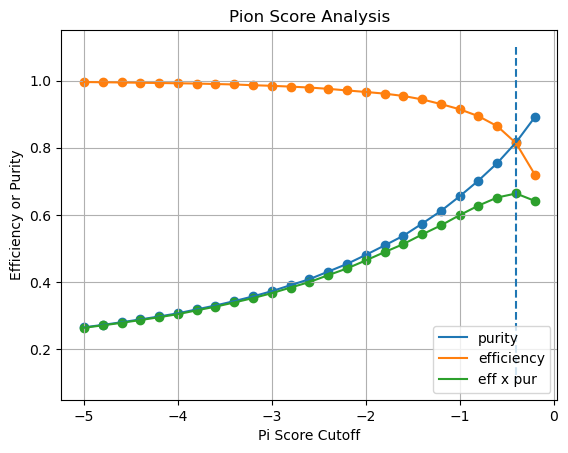

In [67]:
cut_vals = np.arange(-5, 0, 0.2)
eff = []
pur = []
for cut in cut_vals:
    df_cut = df.Define('passescut', f'pi_select({cut}, trackPiScore)')
    
    total_df = df_cut.Define('truecut', 'true_pi(trackTruePID)')
    
    trueNum = total_df.Filter('truecut == true').Count().GetValue()
    selNum = total_df.Filter('passescut == true').Count().GetValue()
    passed = total_df.Filter('truecut == true && passescut == true').Count().GetValue()
    eff.append(passed / trueNum)
    pur.append(passed / selNum)
eff = np.array(eff)
pur = np.array(pur)

plt.plot(cut_vals, pur, label = 'purity')
plt.scatter(cut_vals, pur)
plt.plot(cut_vals, eff, label = 'efficiency')
plt.scatter(cut_vals, eff)
plt.plot(cut_vals, eff*pur, label = 'eff x pur')
plt.scatter(cut_vals, eff*pur)
plt.xlabel('Pi Score Cutoff')
plt.ylabel('Efficiency or Purity')
plt.title('Pion Score Analysis')
plt.grid()
plt.vlines(-0.4, 1.1, 0.1, ls = '--')
plt.legend();

In [68]:
%%cpp
int pro_select(float cutoff, ROOT::VecOps::RVec<float> trackPrScore){
    int passfail = false;
    for (size_t i = 0; i < trackPrScore.size();++i){
        if (trackPrScore.at(i) > cutoff){
            passfail = true;
        }
    }
    return passfail;
}

In [69]:
%%cpp
int true_pro(ROOT::VecOps::RVec<int> trackTruePID){
    int passfail = false;
    for (size_t i = 0; i< trackTruePID.size(); ++i){
        if (std::abs(trackTruePID.at(i)) == 2212){
            passfail = true;
        }
    }
    return passfail;
}

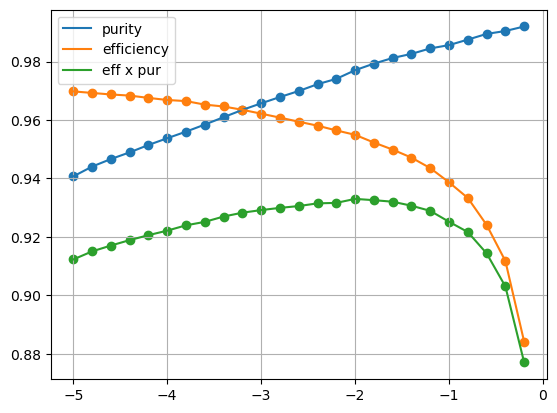

In [70]:
cut_vals = np.arange(-5, 0, 0.2)
eff = []
pur = []
for cut in cut_vals:
    df_cut = df.Define('passescut', f'pro_select({cut}, trackPrScore)')
    
    total_df = df_cut.Define('truecut', 'true_pro(trackTruePID)')
    
    trueNum = total_df.Filter('truecut == true').Count().GetValue()
    selNum = total_df.Filter('passescut == true').Count().GetValue()
    passed = total_df.Filter('truecut == true && passescut == true').Count().GetValue()
    eff.append(passed / trueNum)
    pur.append(passed / selNum)
eff = np.array(eff)
pur = np.array(pur)

plt.plot(cut_vals, pur, label = 'purity')
plt.scatter(cut_vals, pur)
plt.plot(cut_vals, eff, label = 'efficiency')
plt.scatter(cut_vals, eff)
plt.plot(cut_vals, eff*pur, label = 'eff x pur')
plt.scatter(cut_vals, eff*pur)
plt.grid()
#plt.vlines(-0.4, 1.1, 0.1, ls = '--')
plt.legend();

In [71]:
%%cpp
int Mu_select(float cutoff, ROOT::VecOps::RVec<float> trackMuScore){
    int passfail = false;
    for (size_t i = 0; i < trackMuScore.size();++i){
        if (trackMuScore.at(i) > cutoff){
            passfail = true;
        }
    }
    return passfail;
}

In [72]:
%%cpp
int true_Mu(ROOT::VecOps::RVec<int> trackTruePID){
    int passfail = false;
    for (size_t i = 0; i< trackTruePID.size(); ++i){
        if (std::abs(trackTruePID.at(i)) == 13){
            passfail = true;
        }
    }
    return passfail;
}

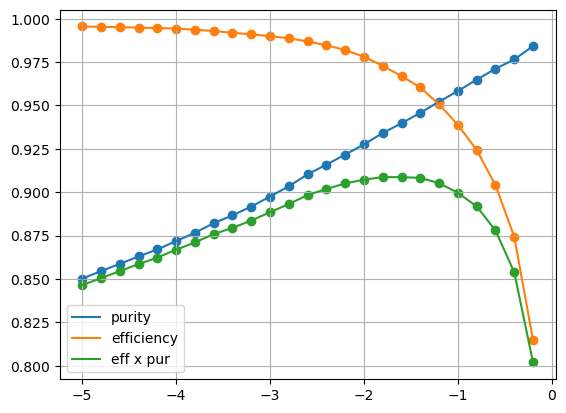

In [73]:
cut_vals = np.arange(-5, 0, 0.2)
eff = []
pur = []
for cut in cut_vals:
    df_cut = df.Define('passescut', f'Mu_select({cut}, trackMuScore)')
    
    total_df = df_cut.Define('truecut', 'true_Mu(trackTruePID)')
    
    trueNum = total_df.Filter('truecut == true').Count().GetValue()
    selNum = total_df.Filter('passescut == true').Count().GetValue()
    passed = total_df.Filter('truecut == true && passescut == true').Count().GetValue()
    eff.append(passed / trueNum)
    pur.append(passed / selNum)
eff = np.array(eff)
pur = np.array(pur)

plt.plot(cut_vals, pur, label = 'purity')
plt.scatter(cut_vals, pur)
plt.plot(cut_vals, eff, label = 'efficiency')
plt.scatter(cut_vals, eff)
plt.plot(cut_vals, eff*pur, label = 'eff x pur')
plt.scatter(cut_vals, eff*pur)
plt.grid()
#plt.vlines(-0.4, 1.1, 0.1, ls = '--')
plt.legend();